a)

/home/radbrad/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/radbrad/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/radbrad/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/radbrad/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 58s 1ms/sample - loss: 3.7735 - acc: 0.1329 - val_loss: 3.3235 - val_acc: 0.1965
Epoch 2/100
40000/40000 [==============================] - 60s 1ms/sample - loss: 2.9998 - acc: 0.2607 - val_loss: 3.0556 - val_acc: 0.2518
Epoch 3/100
40000/40000 [==============================] - 60s 1ms/sample - loss: 2.5757 - acc: 0.3442 - val_loss: 3.0152 - val_acc: 0.2686
Epoch 4/100
40000/40000 [==============================] - 60s 1ms/sample - loss: 2.2020 - acc: 0.4200 - val_loss: 3.0393 - val_acc: 0.2788
Epoch 5/100
40000/40000 [==============================] - 60s 1ms/sample - loss: 1.8149 - acc: 0.5087 - val_loss: 3.1793 - val_acc: 0.2868
Epoch 6/100
40000/40000 [==============================] - 60s 1ms/sample - loss: 1.4349 - acc: 0.6021 - val_loss: 3.4140 - val_acc:

Epoch 56/100
40000/40000 [==============================] - 60s 1ms/sample - loss: 0.0831 - acc: 0.9780 - val_loss: 15.6521 - val_acc: 0.2307
Epoch 57/100
40000/40000 [==============================] - 60s 2ms/sample - loss: 0.0705 - acc: 0.9822 - val_loss: 15.5598 - val_acc: 0.2323
Epoch 58/100
40000/40000 [==============================] - 60s 2ms/sample - loss: 0.0808 - acc: 0.9799 - val_loss: 15.0100 - val_acc: 0.2194
Epoch 59/100
40000/40000 [==============================] - 60s 1ms/sample - loss: 0.0900 - acc: 0.9778 - val_loss: 15.1183 - val_acc: 0.2276
Epoch 60/100
40000/40000 [==============================] - 60s 1ms/sample - loss: 0.0697 - acc: 0.9833 - val_loss: 15.7189 - val_acc: 0.2348
Epoch 61/100
40000/40000 [==============================] - 59s 1ms/sample - loss: 0.0855 - acc: 0.9793 - val_loss: 16.1143 - val_acc: 0.2269
Epoch 62/100
40000/40000 [==============================] - 60s 1ms/sample - loss: 0.0695 - acc: 0.9827 - val_loss: 16.5388 - val_acc: 0.2124
Epoch 

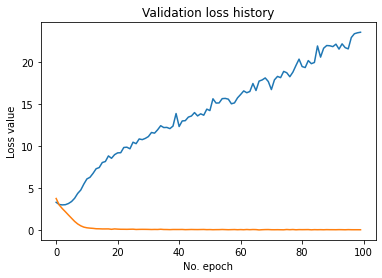

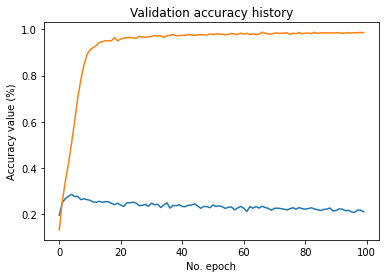

In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

if "__main__" == __name__:

    # config
    batch_size = 50
    img_width, img_height, img_num_channels = 32, 32, 3
    loss_function = sparse_categorical_crossentropy
    no_classes = 100
    no_epochs = 100
    optimizer = Adam()
    validation_split = 0.2
    verbosity = 1

    # load data
    np_load_old = np.load
    np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
    (X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')
    np.load = np_load_old

    input_shape = (img_width, img_height, img_num_channels)

    # Parse numbers as floats
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    # Normalize data
    X_train = X_train / 255
    X_test = X_test / 255

    # Create the model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(no_classes, activation='softmax'))

    # Compile the model
    model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])

    # Fit data to model
    history = model.fit(X_train, y_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)
    pred = np.argmax(model.predict(X_test), axis=1)
    
    # Generate generalization metrics
    score = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

    # Visualize history
    # Plot history: Loss
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['loss'])
    plt.title('Validation loss history')
    plt.ylabel('Loss value')
    plt.xlabel('No. epoch')
    plt.show()

    # Plot history: Accuracy
    plt.plot(history.history['val_acc'])
    plt.plot(history.history['acc'])
    plt.title('Validation accuracy history')
    plt.ylabel('Accuracy value (%)')
    plt.xlabel('No. epoch')
    plt.show()

b)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 17s 413us/sample - loss: 4.1744 - acc: 0.0553 - val_loss: 3.8775 - val_acc: 0.0951
Epoch 2/20
40000/40000 [==============================] - 16s 402us/sample - loss: 3.7235 - acc: 0.1212 - val_loss: 3.5860 - val_acc: 0.1377
Epoch 3/20
40000/40000 [==============================] - 16s 403us/sample - loss: 3.4162 - acc: 0.1674 - val_loss: 3.4367 - val_acc: 0.1715
Epoch 4/20
40000/40000 [==============================] - 16s 404us/sample - loss: 3.2516 - acc: 0.1958 - val_loss: 3.3566 - val_acc: 0.1817
Epoch 5/20
40000/40000 [==============================] - 16s 405us/sample - loss: 3.1222 - acc: 0.2172 - val_loss: 3.2781 - val_acc: 0.2025
Epoch 6/20
40000/40000 [==============================] - 16s 408us/sample - loss: 3.0058 - acc: 0.2398 - val_loss: 3.2437 - val_acc: 0.2087
Epoch 7/20
40000/40000 [==============================] - 16s 405us/sample - loss: 2.8955 - acc: 0.2591 

Epoch 17/20
40000/40000 [==============================] - 38s 955us/sample - loss: 1.0813 - acc: 0.7098 - val_loss: 5.0767 - val_acc: 0.1989
Epoch 18/20
40000/40000 [==============================] - 38s 960us/sample - loss: 0.9498 - acc: 0.7422 - val_loss: 5.5307 - val_acc: 0.1943
Epoch 19/20
40000/40000 [==============================] - 38s 960us/sample - loss: 0.8346 - acc: 0.7758 - val_loss: 5.8765 - val_acc: 0.1911
Epoch 20/20
40000/40000 [==============================] - 38s 960us/sample - loss: 0.7303 - acc: 0.8037 - val_loss: 6.3280 - val_acc: 0.1915
Test loss: 6.227448754882812 / Test accuracy: 0.20430000126361847
Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 48s 1ms/sample - loss: 4.3238 - acc: 0.0492 - val_loss: 4.0223 - val_acc: 0.0872
Epoch 2/20
40000/40000 [==============================] - 47s 1ms/sample - loss: 3.8640 - acc: 0.1090 - val_loss: 3.7666 - val_acc: 0.1232
Epoch 3/20
40000/40000 [==============

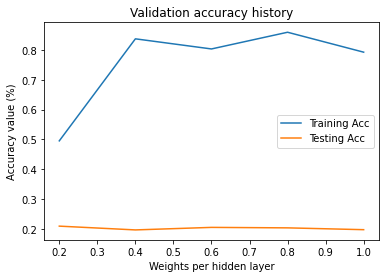

In [5]:
import numpy as np
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

if "__main__" == __name__:

    # config
    batch_size = 50
    img_width, img_height, img_num_channels = 32, 32, 3
    loss_function = sparse_categorical_crossentropy
    no_classes = 100
    no_epochs = 20
    optimizer = Adam()
    validation_split = 0.2
    verbosity = 1

    # load data
    np_load_old = np.load
    np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
    (X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')
    np.load = np_load_old

    input_shape = (img_width, img_height, img_num_channels)

    # Parse numbers as floats
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    # Normalize data
    X_train = X_train / 255
    X_test = X_test / 255

    weight_counts = [100, 200, 300, 400, 500]
    results_train = []
    results_test = []
    for weight_count in weight_counts:

        # Create the model
        model = Sequential()
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
        model.add(Flatten())
        model.add(Dense(weight_count, activation='relu'))
        model.add(Dense(weight_count, activation='relu'))
        model.add(Dense(no_classes, activation='softmax'))

        # Compile the model
        model.compile(loss=loss_function,
                    optimizer=optimizer,
                    metrics=['accuracy'])

        # Fit data to model
        history = model.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=no_epochs,
                verbose=verbosity,
                validation_split=validation_split)
        pred = np.argmax(model.predict(X_test), axis=1)
        
        # Generate generalization metrics
        score = model.evaluate(X_test, y_test, verbose=0)
        results_train.append(history.history['acc'][-1])
        results_test.append(score[1])
        print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

    # Plot history: Accuracy
    plt.plot(weight_counts, results_train, label='Training Acc')
    plt.plot(weight_counts, results_test, label='Testing Acc')
    plt.title('Validation accuracy history')
    plt.ylabel('Accuracy value (%)')
    plt.xlabel('Weights per hidden layer')
    plt.legend()
    plt.show()

c)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 3s 433us/sample - loss: 4.4239 - acc: 0.0347 - val_loss: 4.1976 - val_acc: 0.0585
Epoch 2/20
8000/8000 [==============================] - 3s 399us/sample - loss: 3.9864 - acc: 0.0857 - val_loss: 3.9150 - val_acc: 0.1050
Epoch 3/20
8000/8000 [==============================] - 3s 430us/sample - loss: 3.6363 - acc: 0.1452 - val_loss: 3.7221 - val_acc: 0.1335
Epoch 4/20
8000/8000 [==============================] - 3s 421us/sample - loss: 3.3269 - acc: 0.1980 - val_loss: 3.6264 - val_acc: 0.1545
Epoch 5/20
8000/8000 [==============================] - 3s 421us/sample - loss: 3.0239 - acc: 0.2529 - val_loss: 3.5955 - val_acc: 0.1575
Epoch 6/20
8000/8000 [==============================] - 3s 403us/sample - loss: 2.7451 - acc: 0.3041 - val_loss: 3.6597 - val_acc: 0.1685
Epoch 7/20
8000/8000 [==============================] - 3s 410us/sample - loss: 2.4627 - acc: 0.3670 - val_loss: 3.6983 - va

24000/24000 [==============================] - 10s 403us/sample - loss: 1.1447 - acc: 0.6983 - val_loss: 5.4255 - val_acc: 0.1797
Epoch 18/20
24000/24000 [==============================] - 10s 404us/sample - loss: 1.0287 - acc: 0.7300 - val_loss: 5.7827 - val_acc: 0.1803
Epoch 19/20
24000/24000 [==============================] - 10s 404us/sample - loss: 0.9153 - acc: 0.7598 - val_loss: 6.2132 - val_acc: 0.1688
Epoch 20/20
24000/24000 [==============================] - 10s 404us/sample - loss: 0.8193 - acc: 0.7864 - val_loss: 6.5507 - val_acc: 0.1803
Test loss: 6.790379782867432 / Test accuracy: 0.16619999706745148
Train on 32000 samples, validate on 8000 samples
Epoch 1/20
32000/32000 [==============================] - 13s 404us/sample - loss: 4.1902 - acc: 0.0564 - val_loss: 3.8877 - val_acc: 0.0931
Epoch 2/20
32000/32000 [==============================] - 13s 395us/sample - loss: 3.7285 - acc: 0.1252 - val_loss: 3.6030 - val_acc: 0.1421
Epoch 3/20
32000/32000 [=======================

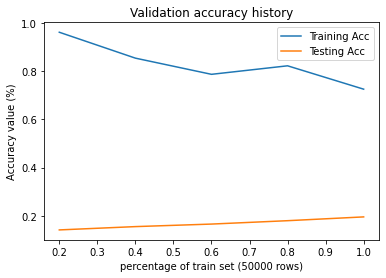

In [4]:
import numpy as np
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

if "__main__" == __name__:

    # config
    batch_size = 50
    img_width, img_height, img_num_channels = 32, 32, 3
    loss_function = sparse_categorical_crossentropy
    no_classes = 100
    no_epochs = 20
    optimizer = Adam()
    validation_split = 0.2
    verbosity = 1

    # load data
    np_load_old = np.load
    np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
    (X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')
    np.load = np_load_old

    input_shape = (img_width, img_height, img_num_channels)

    # Parse numbers as floats
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    # Normalize data
    X_train = X_train / 255
    X_test = X_test / 255

    percentages = [.2, .4, .6, .8, 1]
    results_train = []
    results_test = []
    for percentage in percentages:

        # Create the model
        model = Sequential()
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
        model.add(Flatten())
        model.add(Dense(100, activation='relu'))
        model.add(Dense(100, activation='relu'))
        model.add(Dense(no_classes, activation='softmax'))

        # Compile the model
        model.compile(loss=loss_function,
                    optimizer=optimizer,
                    metrics=['accuracy'])

        # Fit data to model
        history = model.fit(X_train[:int(np.floor(len(X_train) * percentage))], y_train[:int(np.floor(len(y_train) * percentage))],
                batch_size=batch_size,
                epochs=no_epochs,
                verbose=verbosity,
                validation_split=validation_split)
        pred = np.argmax(model.predict(X_test), axis=1)
        
        # Generate generalization metrics
        score = model.evaluate(X_test, y_test, verbose=0)
        results_train.append(history.history['acc'][-1])
        results_test.append(score[1])
        print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

    # Plot history: Accuracy
    plt.plot(percentages, results_train, label='Training Acc')
    plt.plot(percentages, results_test, label='Testing Acc')
    plt.title('Validation accuracy history')
    plt.ylabel('Accuracy value (%)')
    plt.xlabel('percentage of train set (50000 rows)')
    plt.legend()
    plt.show()

d)

Based on this neural network and application, the ideal architecture appears to have an epoch count of 20, 300 weights per hidden layer, and running 80% of the training data set for the best balance of performance and speed.

e)

You could use an ensemble of neural networks to improve the test prediction performance by having each network focus on a grouping of images, say from the cifar-10 classification and then add the resulting weights together for the final solution